In [1]:
using Pkg
#Pkg.add("NBInclude")

Latex Macros:
$$
\newcommand{\E}{\text{E}}
\newcommand{\mbf}{\mathbf}
\newcommand{\bs}{\boldsymbol}
\newcommand{\Cov}{\text{Cov}}
\newcommand{\Var}{\text{Var}}
\newcommand{\Cov}{\text{Cov}}
\newcommand{\A}[1]{\mathbf{A}_{#1}}
\newcommand{\Ai}[1]{\mathbf{A}^{#1}}
$$

In [2]:
macro javascript_str(s) display("text/javascript", s); end
javascript"""
    MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });
    MathJax.Hub.Queue( 
        ["resetEquationNumbers",MathJax.InputJax.TeX], 
        ["PreProcess",MathJax.Hub], 
        ["Reprocess",MathJax.Hub] 
    );
"""

# Gibbs Sampling of Fixed and Random Effects

Consider the mixed linear model

\begin{equation}
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \mathbf{Zu} + \mathbf{e}, 
\end{equation}

where $\boldsymbol{\beta}$ is a vector of fixed effects, $\mathbf{X}$ is an observed matrix that relates $\boldsymbol{\beta}$ to $\mathbf{y}$, $\mathbf{u}$ is a vector of multivariate normal random effects with null means and covariance matrix $\mathbf{G}\sigma^2_u$, and $\mathbf{e}$ is a vector of multivariate normal residuals with null means and covariance matrix $\mathbf{R}\sigma^2_e$. The fixed effects are usually assigned a flat prior distribution, and the matrices $\mathbf{G}$ and $\mathbf{R}$ are assumed to be known. The variance components $\sigma^2_u$ and $\sigma^2_e$ will be assigned scaled inverted chi-square prior distributions with scale parameter $S_{u}^{2}$ and degrees of freedom $\nu_{u}$ for $\sigma^2_u$ and parameters $S_{e}^{2}$ and $\nu_{e}$ for $\sigma^2_e$.

If we denote the location parameters ($\bs{\beta}, \mbf{u}$) of the model by $\bs{\theta}$, as we have seen before, the posteior distribution of $\bs{\theta}$ is multivariate normal with mean given by the solution to

$$
\mbf{C}\hat{\bs{\theta}} = \mbf{r}
$$

and the variance is $\mbf{C}^{-1}\sigma^2_e$,
where $\mbf{C}$ and $\mbf{r}$ are the coefficient matrix and right-hand-side of the MME. So, the quadratic in the exponent of this normal distribution is:



\begin{equation}
Q = \frac{-1}{2\sigma^2_e}(\bs{\theta} - \hat{\bs{\theta}})'\mathbf{C}(\bs{\theta} - \hat{\bs{\theta}}).
\label{eq:Q1}
\end{equation}

In order to use the single-site Gibbs sampler to construct a Markov chain for $\bs{\theta}$, we need to derive the full-conditional posterior distribution for $(\theta_i|\text{ELSE})$, where $\text{ELSE}$ stands for all other variables in the model other than $\theta_i$. To simplify this derivation, $\bs{\theta}$ is partitioned as:
$$
\bs{\theta} = [\bs{\theta}_1, \bs{\theta}_2],
$$
where $\bs{\theta}_1 = \theta_i$ and $\bs{\theta}_2$ contains the remaining elements of $\bs{\theta}$. Now, the quadratic (\ref{eq:Q1}) can be written as:

\begin{equation}
Q = \frac{-1}{2\sigma^2_e}
\begin{bmatrix}
(\bs{\theta}_1 - \hat{\bs{\theta}}_1) & (\bs{\theta}_2 - \hat{\bs{\theta}}_2)
\end{bmatrix}
\begin{bmatrix}
\mathbf{C}_{11} & \mathbf{C}_{12} \\
\mathbf{C}_{21} & \mathbf{C}_{22}
\end{bmatrix}
\begin{bmatrix}
(\bs{\theta}_1 - \hat{\bs{\theta}}_1) \\ 
(\bs{\theta}_2 - \hat{\bs{\theta}}_2)
\end{bmatrix},
\label{eq:Q2}
\end{equation}

where the coefficient matrix $\mbf{C}$ has also been partitioned to correspond to the partitioning of $\bs{\theta}$.

To derive the distribution of $(\bs{\theta}_1|\bs{\theta}_2)$, we need to only consider the terms in (\ref{eq:Q2}) that involve $\bs{\theta}_1$. These terms are (after dropping $\frac{-1}{2\sigma^2_e}$):


\begin{align}
Q_1 &=  \bs{\theta}_1'\mbf{C}_{11}\bs{\theta}_1 - 2\bs{\theta}_1'\mbf{C}_{11}\hat{\bs{\theta}}_1
    + 2\bs{\theta}_1'\mbf{C}_{12}\bs{\theta}_2 - 2\bs{\theta}_1'\mbf{C}_{12}\hat{\bs{\theta}}_2 \label{eq:Q_11} \\ 
    &= (\bs{\theta}_1 - \tilde{\bs{\theta}}_1)'\mbf{C}_{11}(\bs{\theta}_1 - \tilde{\bs{\theta}}_1) 
       - \tilde{\bs{\theta}}_1'\mbf{C}_{11}\tilde{\bs{\theta}}_1,
       \label{eq:Q_12}
\end{align}

where for (\ref{eq:Q_11}) to equal (\ref{eq:Q_12}), $\tilde{\bs{\theta}}_1$ must satisfy the equality: 
$$
\bs{\theta}_1'\mbf{C}_{11}\tilde{\bs{\theta}}_1 = \bs{\theta}_1'\mbf{C}_{11}\hat{\bs{\theta}}_1 
                                                       + \bs{\theta}_1'\mbf{C}_{12}\hat{\bs{\theta}}_2 
                                                       - \bs{\theta}_1'\mbf{C}_{12}\bs{\theta}_2.
$$
This equlity must hold for all $\bs{\theta}_1$, and so
\begin{align}
\mbf{C}_{11}\tilde{\bs{\theta}}_1 &= \mbf{C}_{11}\hat{\bs{\theta}}_1 
                                  + \mbf{C}_{12}\hat{\bs{\theta}}_2
                                  - \mbf{C}_{12}\bs{\theta}_2 \\
\mbf{C}_{11}\tilde{\bs{\theta}}_1 &= \mbf{r}_1 - \mbf{C}_{12}\bs{\theta}_2, \label{eq:singleSiteGibbs}                                                                   
\end{align}
because the right-hand-side of the MME corresponding to $\hat{\bs{\theta}}_1$ is equal to 

$$
\mbf{C}_{11}\hat{\bs{\theta}}_1 + \mbf{C}_{12}\hat{\bs{\theta}}_2 = \mbf{r}_1.
$$

Thus, $(\bs{\theta}_1|\bs{\theta}_2) \sim \text{N}(\tilde{\bs{\theta}},\mbf{C}_{11}^{-1}\sigma^2_e)$. An alternative derivation is given in Sorensen and Gianola (2002).

In [3]:
function Gibbs!(A,x,b,varRes::Float64,nIter::Int64;outFreq=100)
    n = size(x,1)
    xMean = zeros(n)
    for iter = 1:nIter
        if iter%outFreq==0
            println("at sample: ",iter)
        end
        for i=1:n
            cVarInv = 1.0/A[i,i]
            cMean   = cVarInv*(b[i] - A[:,i]'x) + x[i]
            x[i]    = randn()*sqrt(cVarInv*varRes) + cMean
        end
        xMean += (x - xMean)/iter
    end
    return xMean
end

Gibbs! (generic function with 1 method)

In [22]:
using NBInclude
@nbinclude("../MME/3.7.1.BuildMME.ipynb"; regex=r"#\s*EXECUTE")

getLhsRhs (generic function with 1 method)

In [5]:
pedigree = get_pedigree("simData.ped",separator=",",header=false);

The delimiter in simData.ped is ','.


coding pedigree... 100%|████████████████████████████████| Time: 0:00:00
calculating inbreeding... 100%|█████████████████████████| Time: 0:00:00


Finished!


In [6]:
data = CSV.read("data.phen")

,Ind,Mat,y
,Int64,Int64,Float64
1,26,12,7.434
2,27,10,10.367
3,28,19,5.996
4,29,15,10.084
5,30,23,2.567
6,31,8,-0.198
7,32,21,12.163
8,33,16,0.833
9,34,17,2.39


In [7]:
using Statistics

In [70]:
var(data[:,3])

21.821335541313132

In [23]:
varGen = 10.0
varRes = 10.0
mme = initMME("y = intercept + Ind",varRes);
setRandom(mme,"Ind",varGen,pedigree,estimate=true);

In [25]:
lhs,rhs,names = getLhsRhs(mme,data);

In [26]:
x = zero(rhs);

In [27]:
nIter = 50000
solGibbs = Gibbs!(lhs,x,rhs,varRes,nIter;outFreq=1000)

at sample: 1000
at sample: 2000
at sample: 3000
at sample: 4000
at sample: 5000
at sample: 6000
at sample: 7000
at sample: 8000
at sample: 9000
at sample: 10000
at sample: 11000
at sample: 12000
at sample: 13000
at sample: 14000
at sample: 15000
at sample: 16000
at sample: 17000
at sample: 18000
at sample: 19000
at sample: 20000
at sample: 21000
at sample: 22000
at sample: 23000
at sample: 24000
at sample: 25000
at sample: 26000
at sample: 27000
at sample: 28000
at sample: 29000
at sample: 30000
at sample: 31000
at sample: 32000
at sample: 33000
at sample: 34000
at sample: 35000
at sample: 36000
at sample: 37000
at sample: 38000
at sample: 39000
at sample: 40000
at sample: 41000
at sample: 42000
at sample: 43000
at sample: 44000
at sample: 45000
at sample: 46000
at sample: 47000
at sample: 48000
at sample: 49000
at sample: 50000


126-element Array{Float64,1}:
  5.316038504471054  
  2.377700962919542  
  1.5914938754689445 
  3.60447235027775   
  0.5863537843826268 
  2.5910150906900755 
 -1.7988484235408178 
  0.8970600360192275 
  3.251761235846149  
  1.6599258380636668 
 -3.2325243908381274 
 -0.6105412162734654 
 -0.6811959958871143 
  ⋮                  
  2.5296924042821334 
 -2.2907380713046184 
 -0.2062133153457841 
  1.7059392043208437 
 -2.6716665626782743 
 -1.1587139575057614 
 -5.121431064536358  
  0.00733443042457625
  3.1911528928105435 
 -0.8432449135490186 
  1.1421960536208804 
 -0.10687442982775827

In [28]:
QRLhs = qr(lhs) 
sol = QRLhs\rhs
[names solGibbs sol]

126×3 Array{Any,2}:
 "intercept"   5.31604      5.31345  
 "Ind: 5"      2.3777       2.37165  
 "Ind: 21"     1.59149      1.61821  
 "Ind: 32"     3.60447      3.61314  
 "Ind: 15"     0.586354     0.571631 
 "Ind: 29"     2.59102      2.57128  
 "Ind: 1"     -1.79885     -1.82355  
 "Ind: 4"      0.89706      0.891078 
 "Ind: 20"     3.25176      3.24584  
 "Ind: 54"     1.65993      1.64616  
 "Ind: 22"    -3.23252     -3.22863  
 "Ind: 78"    -0.610541    -0.621334 
 "Ind: 81"    -0.681196    -0.696458 
 ⋮                                   
 "Ind: 45"     2.52969      2.54842  
 "Ind: 68"    -2.29074     -2.30608  
 "Ind: 56"    -0.206213    -0.212933 
 "Ind: 116"    1.70594      1.70612  
 "Ind: 36"    -2.67167     -2.67382  
 "Ind: 66"    -1.15871     -1.14998  
 "Ind: 76"    -5.12143     -5.10858  
 "Ind: 95"     0.00733443   0.0174043
 "Ind: 85"     3.19115      3.19323  
 "Ind: 48"    -0.843245    -0.814834 
 "Ind: 103"    1.1422       1.1539   
 "Ind: 30"    -0.106874    -0.

In [29]:
cor(ans[:,2:3])

2×2 Array{Float64,2}:
 1.0       0.999984
 0.999984  1.0     

In [30]:
function sampleLoc!(mme)
    A = mme.mmeLhs
    b = mme.mmeRhs
    x = mme.mmeSpl
    n = size(x,1)
    for i=1:n
        cVarInv = 1.0/A[i,i]
        cMean   = cVarInv*(b[i] - A[:,i]'x) + x[i]
        x[i]    = randn()*sqrt(cVarInv*varRes) + cMean
    end
end

sampleLoc! (generic function with 1 method)

In [31]:
function sampleVar!(mme,iter=0)
    for randomEffect in mme.randomEffectsVec
        if randomEffect.estimate == false continue end
        modelTerm1 = randomEffect.modelTermVec[1]      
        k = modelTerm1.endPos - modelTerm1.startPos
        m = size(randomEffect.modelTermVec,1)
        
        S = zeros(m,m)
        for i=1:m
            modelTermi = randomEffect.modelTermVec[i]
            starti = modelTermi.startPos
            endi = modelTermi.endPos
            ui = mme.mmeSpl[starti:endi]
            for j=i:m
                modelTermj = randomEffect.modelTermVec[j]
                startj = modelTermj.startPos
                endj = modelTermj.endPos
                uj = mme.mmeSpl[startj:endj]
                S[i,j] = ui'randomEffect.Ai*uj
                S[j,i] = S[i,j]
            end
        end
        Vpo = randomEffect.Spr + S
        νpo = randomEffect.νpr + m + k + 2
        V = rand(InverseWishart(νpo,Vpo))
        randomEffect.Vi = inv(V)
        if iter>0
            randomEffect.meanV += (V - randomEffect.meanV)/iter
        end
    end
end

sampleVar! (generic function with 2 methods)

In [71]:
function sampleVarRes!(mme,iter=0)
    n = size(mme.y,1)
    e = mme.y - mme.X*mme.mmeSpl
    νpo = n + mme.νRes
    mme.varRes = (e'e + mme.νRes*mme.SRes)/rand(Chisq(νpo))
    if iter>0
        mme.meanVarRes += (mme.varRes - mme.meanVarRes)/iter
    end  
end

sampleVarRes! (generic function with 2 methods)

In [33]:
mme.varRes

10.0

In [68]:
sampleVarRes!(mme)
mme.varRes

50.13025757669278

In [18]:
using Distributions

In [19]:
using Plots

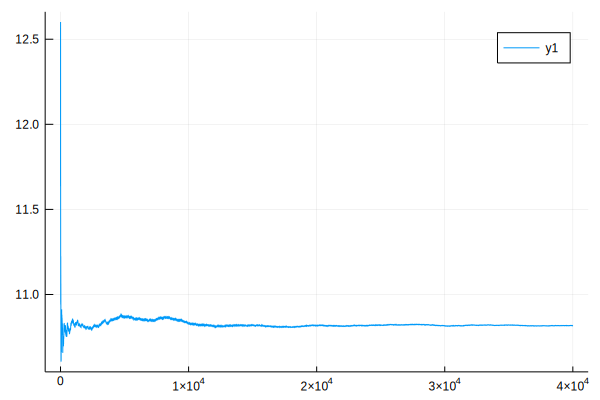

In [73]:
varGen = 10.0
varRes = 10.0
mme = initMME("y = intercept + Ind",varRes);
setRandom(mme,"Ind",varGen,pedigree,estimate=true);
lhs,rhs,names = getLhsRhs(mme,data);
nIter  = 50_000
burnIn = 10_000
iter = 0
res = [
    begin
        global iter, nIter, burnIn
        iter += 1
        sampleLoc!(mme)
        sampleVar!(mme,iter-burnIn)
        sampleVarRes!(mme,iter-burnIn)
        #mme.randomEffectsVec[1].meanV[1,1]
        mme.meanVarRes
    end
    for i = 1:nIter
]
plot(res[(burnIn+2):nIter])

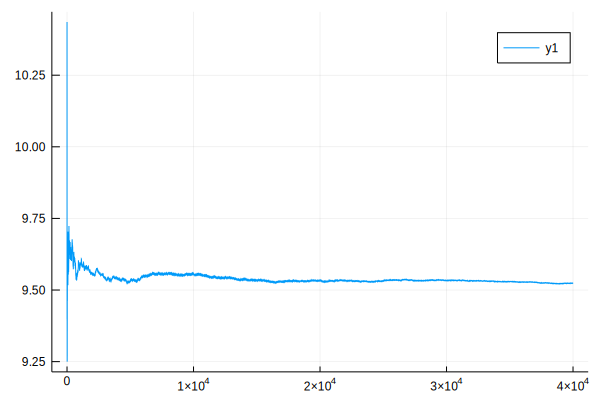

In [74]:
varGen = G0 = [10.0 2.0; 2.0 3.0]
varRes = 10.0
mme = initMME("y = intercept + Ind + Mat",varRes);
setRandom(mme,"Ind, Mat",varGen,pedigree,estimate=true);
lhs,rhs,names = getLhsRhs(mme,data);
nIter  = 50_000
burnIn = 10_000
iter = 0
res = [
    begin
        global iter, nIter, burnIn
        iter += 1
        sampleLoc!(mme)
        sampleVar!(mme,iter-burnIn)
        sampleVarRes!(mme,iter-burnIn)
        mme.randomEffectsVec[1].meanV[1,1]
    end
    for i = 1:nIter
]
plot(res[(burnIn+2):nIter])